 # Все вместе +  SciPy

1. Сгенерируйте точки (x,y) (500 будет достаточно), удовлетворяющие зависимости $y=x^3+2x^2-3x+2$, затем, с помощью numpy.random добавьте к координатам y нормальный шум. С помощью scipy восстановите исходную зависимость, считая тзвестной степень полинома. Вам помощет curvefit или scipy.optimize.minimize, запущенный для суммы квадратичных отклонений. У восстановленной зависимости найдите экстремумы численно. Покажите на графике все вместе: исходные точки, восстановленную зависимость, найденные экстремумы.

In [1]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import minimize
import scipy
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/Violetta/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


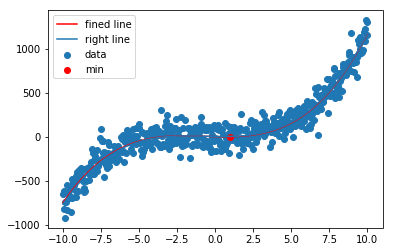

In [100]:
# data
x = list(np.linspace(-10,10,500))
y_noise = [i ** 3 +2*i**2 - 3*i + 2 + np.random.normal(2, 100) for i in x]
y = [i ** 3 +2*i**2 - 3*i + 2 for i in x]
plt.scatter(x, y_noise, label = 'data')
# predict
model = LinearRegression()
x_transform = PolynomialFeatures(3).fit_transform(np.array(x).reshape(-1, 1))
model.fit(x_transform, y_noise)
coef = model.coef_
predicted = np.sum(x_transform * coef, axis = 1)
plt.plot(x, predicted, c='r', label = 'fined line')
plt.plot(x, y, label = 'right line')
#extremum

def extremum(x):
    X = PolynomialFeatures(3).fit_transform(np.array(x).reshape(-1, 1))[0]
    coefs = [0.0, -7.3082106979655395, 2.319851742027994, 1.0550005600156531]#найденные коэфициенты
    return X[0] * coefs[0] + X[1] * coefs[1]  + X[2] * coefs[2] + X[3] * coefs[3]

extremum = minimize(extremum, 0)
plt.scatter(extremum.x, extremum.fun, c = 'r', label = 'min')
plt.legend()
